<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 6 Exercício I** | Introdução ao Matplotlib e ao Seaborn
**Exercícios**<br> 
[Luiz Aires](https://github.com/luizaires)

---

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [2]:
#Selecionando as colunas de interesse
df = sinasc.loc[:, ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]
df.head()

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4


In [3]:
#Verficando os missing em cada coluna
df.isna().sum()

APGAR1         96
APGAR5        103
SEXO            4
GESTACAO     1232
ESTCIVMAE     317
CONSULTAS       0
dtype: int64

In [4]:
#Substituindo os valores NaN para a variável GESTACAO
df['GESTACAO'].fillna('Ignorado', inplace = True)
df['GESTACAO'].isna().sum()

0

In [5]:
#Contagem dos valores para cada um das categoria da varíavel GESTACAO
df['GESTACAO'].value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
Ignorado                1232
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

In [6]:
#Reatribuindo valores da coluna EStado civil da mãe 
df.loc[df['ESTCIVMAE'] == 1, 'ESTCIVMAE'] = 'Solteira'
df.loc[df['ESTCIVMAE'] == 2, 'ESTCIVMAE'] = 'Casada'
df.loc[df['ESTCIVMAE'] == 3, 'ESTCIVMAE'] = 'Viúva'
df.loc[df['ESTCIVMAE'] == 4, 'ESTCIVMAE'] = 'Separado judicialmente'
df.loc[df['ESTCIVMAE'] == 5, 'ESTCIVMAE'] = 'União consensual'
df.loc[df['ESTCIVMAE'] == 9, 'ESTCIVMAE'] = 'Ignorado'
#Preenchindo os missings com o valor 'Ignorado'
df['ESTCIVMAE'].fillna('Ignorado', inplace = True)
#Cotagem dos valores de cada categoria estado civil
df['ESTCIVMAE'].value_counts().sort_values()

Viúva                       57
Separado judicialmente     453
Ignorado                   462
União consensual          7180
Solteira                  8952
Casada                    9924
Name: ESTCIVMAE, dtype: int64

In [7]:
#Substituindo valores da varíavel consulta
df.loc[df['CONSULTAS'] == 1, 'CONSULTAS'] = 'Nenhuma'
df.loc[df['CONSULTAS'] == 2, 'CONSULTAS'] = 'De 2 a 3'
df.loc[df['CONSULTAS'] == 3, 'CONSULTAS'] = 'De 4 a 6'
df.loc[df['CONSULTAS'] == 4, 'CONSULTAS'] = '7 ou mais'
df.loc[df['CONSULTAS'] == 9, 'CONSULTAS'] = 'Ignorado'
#Contagem dos valores
df['CONSULTAS'].value_counts()

7 ou mais    18624
De 4 a 6      5988
De 2 a 3      1379
Nenhuma        986
Ignorado        51
Name: CONSULTAS, dtype: int64

---

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

Text(0.5, 1.0, 'Valor Médio do APGAR1 por Sexo')

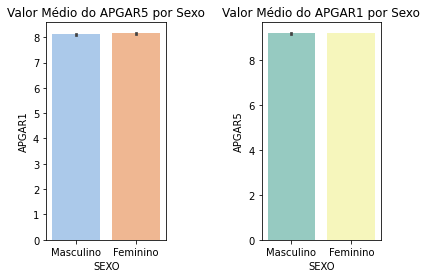

In [8]:
#Plotagem do valor médio do APGAR1 por sexo 
plt.close('all')
fig, ax = plt.subplots(1, 2)
#Plotagem do valor médio do APGAR5 por sexo 
sns.barplot(ax=ax[0],x = 'SEXO', y = 'APGAR1', data = df, palette = 'pastel')
#Plotagem do valor médio do APGAR1 por sexo 
sns.barplot(ax=ax[1],x = 'SEXO', y = 'APGAR5', data = df, palette = 'Set3')
#Ajuste do espacemento
plt.subplots_adjust(wspace = 0.8)
#Criando títulos
ax[0].set_title("Valor Médio do APGAR5 por Sexo")
ax[1].set_title("Valor Médio do APGAR1 por Sexo")

---

In [9]:
#Agrupando as categorias da variável GESTACAO, 
#calculando a média dos valores do APGAR5 de cada categoria e ordenado os valores em ordem crescente
#Atribuindo valores a uma variável
media_grupo = df.groupby('GESTACAO')['APGAR5'].mean().sort_values().values
#Atribuindo os índices a uma variável
nomes_grupo = df.groupby('GESTACAO')['APGAR5'].mean().sort_values().index

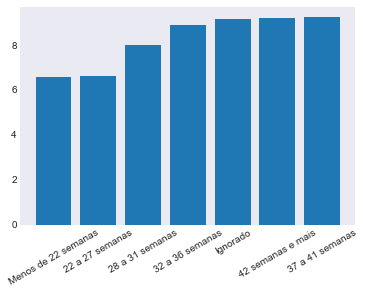

In [10]:
#Plotando o valor médio do APGAR5 por tempo de Gestação
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(nomes_grupo, media_grupo)
ax.tick_params(axis = 'x', rotation = 30)

---

Text(0.5, 1.05, 'Valor Médio do APGAR1 por Tempo de Gestação')

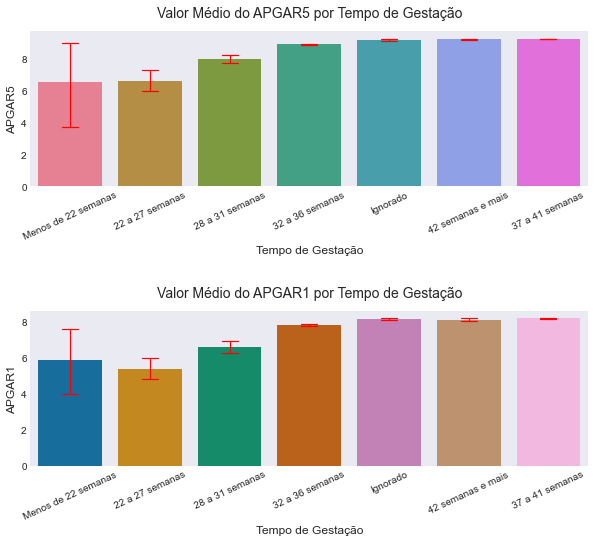

In [11]:
#Plotagem do APGAR5 e APGAR1 por tempo de Gestação, usando seaborn 
plt.close('all')
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
#Ordenando as barras pelo valor médio do APGAR
sns.barplot(ax = ax[0], x = 'GESTACAO', y = 'APGAR5', data = df,
            order = nomes_grupo, palette = 'husl',
            errcolor = 'r', errwidth = 1.2, capsize = 0.2)
sns.barplot(ax = ax[1], x = 'GESTACAO', y = 'APGAR1',
            data = df, order = nomes_grupo, palette = 'colorblind',
            errcolor = 'r', errwidth = 1.2, capsize = 0.2)
#Rotacionando os ticks no eixo x
ax[0].tick_params(axis = 'x', rotation = 25)
ax[1].tick_params(axis = 'x', rotation = 25)
#Ajuste do espaçamento entre os gráficos
plt.subplots_adjust(hspace = 0.8)
#Nomeando rótulo no eixo x
ax[0].set_xlabel('Tempo de Gestação', fontsize = 12)
ax[1].set_xlabel('Tempo de Gestação', fontsize = 12)
#Nomeando rótulo no eixo y
ax[0].set_ylabel('APGAR5', fontsize = 12)
ax[1].set_ylabel('APGAR1', fontsize = 12)
#Colocando o título
ax[0].set_title('Valor Médio do APGAR5 por Tempo de Gestação', fontsize = 14, y = 1.05)
ax[1].set_title('Valor Médio do APGAR1 por Tempo de Gestação', fontsize = 14, y = 1.05)

---

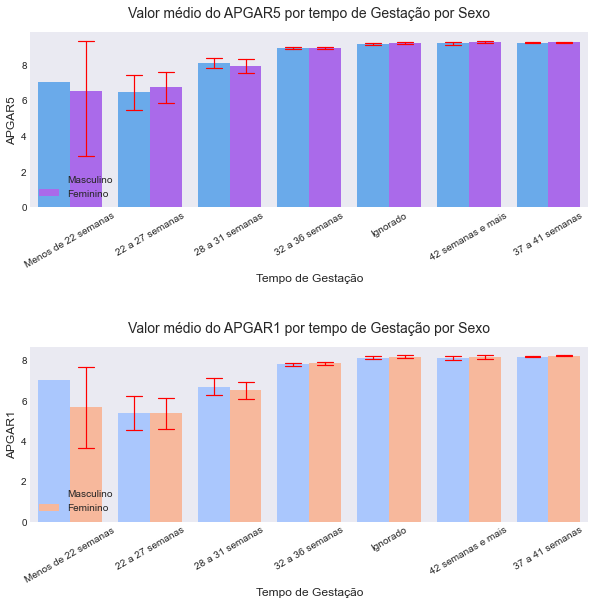

In [12]:
#Plotagem do APGAR5 médio por tempo de Gestação de acordo com o sexo ordenado em ordem crescente
fig, ax = plt.subplots(2, 1, figsize = (10, 9))
sns.barplot(ax = ax[0], x = 'GESTACAO', y = 'APGAR5', hue = 'SEXO', data = df,
           order = nomes_grupo, palette = 'cool',
           errcolor = 'r', errwidth = 1.2, capsize = 0.2)
#Plotagem do APGAR5 médio por tempo de Gestação de acordo com o sexo ordenado em ordem crescente
sns.barplot(ax = ax[1], x = 'GESTACAO', y = 'APGAR1', hue = 'SEXO', data = df,
           order = nomes_grupo, palette = 'coolwarm', saturation = 1,
           errcolor = 'r', errwidth = 1.2, capsize = 0.2)
#Rotação dos ticks no eixo x
ax[0].tick_params(axis = 'x', rotation = 30)
ax[1].tick_params(axis = 'x', rotation = 30)
#Ajuste do espaçamento entre os gráficos
plt.subplots_adjust(hspace = 0.8)
#Eixo x
ax[0].set_xlabel('Tempo de Gestação', fontsize = 12)
ax[1].set_xlabel('Tempo de Gestação', fontsize = 12)
#Eixo y
ax[0].set_ylabel('APGAR5', fontsize = 12)
ax[1].set_ylabel('APGAR1', fontsize = 12)
#Título
ax[0].set_title('Valor médio do APGAR5 por tempo de Gestação por Sexo', fontsize = 14, y = 1.05)
ax[1].set_title('Valor médio do APGAR1 por tempo de Gestação por Sexo', fontsize = 14, y = 1.05)
#Legendas
ax[0].legend(loc='best')
ax[1].legend(loc='best')

---

In [13]:
APGAR5_med_ESTCIVMAE = df.groupby('ESTCIVMAE')['APGAR5'].mean()
APGAR5_med_ESTCIVMAE

ESTCIVMAE
Casada                    9.216334
Ignorado                  9.187364
Separado judicialmente    9.141907
Solteira                  9.113394
União consensual          9.211197
Viúva                     9.210526
Name: APGAR5, dtype: float64

[Text(0.5, 0, 'Estado civil da mãe'),
 Text(0, 0.5, 'APGAR5 Médio'),
 Text(0.5, 1.0, 'APGAR5 Médio por Estado Civil da Mãe')]

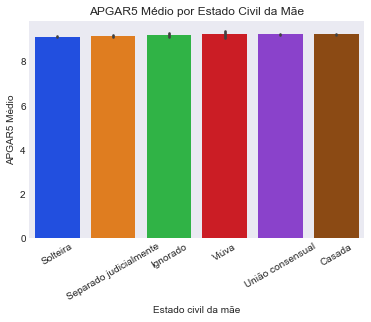

In [14]:
#Plotagem do APGAR5 médio por Estado civil da mãe
fig, ax = plt.subplots()
sns.barplot(ax = ax, x='ESTCIVMAE', y = 'APGAR5', data = df,
           order = APGAR5_med_ESTCIVMAE.sort_values().index, palette = 'bright')
#Rotação dos ticks no eixo x
ax.tick_params(axis = 'x', rotation = 30)
#Adicionando rótulos aos eixos e um título
ax.set(xlabel = 'Estado civil da mãe', ylabel = 'APGAR5 Médio', title = 'APGAR5 Médio por Estado Civil da Mãe')

---

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [15]:
APGAR5_med_consultas = df.groupby('CONSULTAS')['APGAR5'].mean()
APGAR5_med_consultas

CONSULTAS
7 ou mais    9.207188
De 2 a 3     9.057395
De 4 a 6     9.154440
Ignorado     8.860000
Nenhuma      8.981481
Name: APGAR5, dtype: float64

Text(0.5, 1.02, 'APGAR5 Médio por Nº de Consultas')

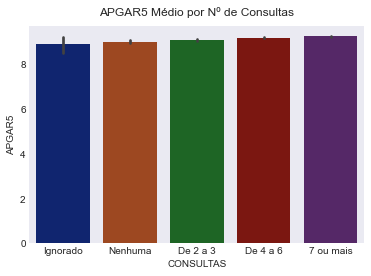

In [16]:
ax = sns.barplot(x = 'CONSULTAS', y = 'APGAR5', estimator = np.mean, data = df,
                order = APGAR5_med_consultas.sort_values().index, palette = 'dark')
ax.set_title('APGAR5 Médio por Nº de Consultas', fontsize = 12, y = 1.02)

---

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

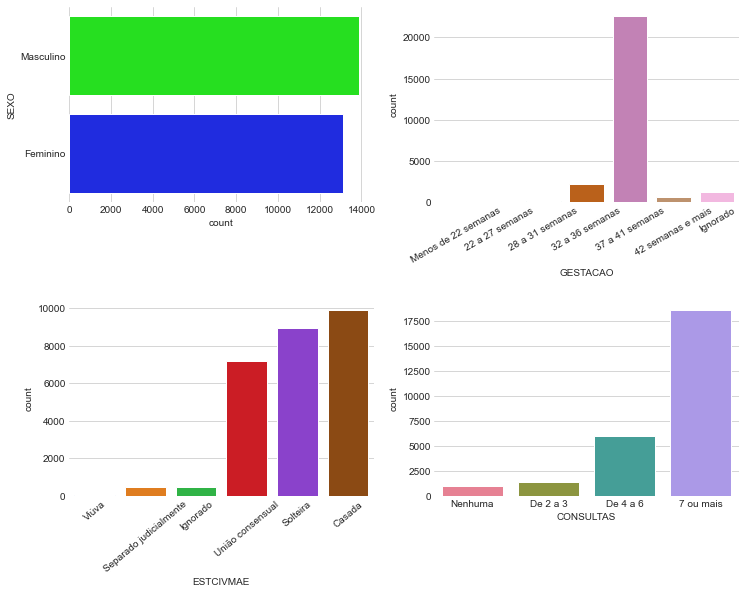

In [17]:
plt.close('all')
sns.set_style("whitegrid")
plt.rc('figure', figsize=(12, 9))
fig, ax = plt.subplots(2, 2)

#Gráfico I-Frequência da variável SEXO
sns.countplot(ax= ax[0,0], y='SEXO', data=df, palette = 'hsv')
#Gráfico II-Frequência para o tempo de gestação
sns.countplot(ax = ax[0,1], x = 'GESTACAO', data = df, 
              order = ['Menos de 22 semanas',
                       '22 a 27 semanas', 
                       '28 a 31 semanas',
                       '32 a 36 semanas',
                       '37 a 41 semanas',
                       '42 semanas e mais',
                       'Ignorado'],
              palette = 'colorblind'
             )
ax[0,1].tick_params(axis = 'x', rotation = 30)
#Gráfico III-Frequência para o estado civil da mãe
sns.countplot(ax = ax[1,0], x = 'ESTCIVMAE', data = df,
              order = df['ESTCIVMAE'].value_counts().sort_values().index,
              palette = 'bright'
             )
ax[1,0].tick_params(axis = 'x', rotation = 40)
#Gráfico IV-Frequência para as categorias de Consultas
sns.countplot(ax = ax[1,1], x = 'CONSULTAS', data = df,
              order = ['Nenhuma', 'De 2 a 3', 'De 4 a 6', '7 ou mais'],
              palette = 'husl'
             )
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

---